# **Proyek Akhir : Klasifikasi Gambar**

## **Kelas Belajar Machine untuk Learning Pemula**



Nama : Abednego Steven

Username Dicoding : abednegosteven

Email : abedwehh@gmail.com

Domisili : Cimahi, Jawa Barat

**Langkah pertama adalah download dataset**

In [12]:
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip



--2021-07-07 14:29:13--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.3’

rockpaperscissors.z   0%[                    ] 535.59K   480KB/s               ^C


**Lalu kita cek versi tensorflow**

In [2]:
import tensorflow as tf
print(tf.__version__)

2.5.0


**Selanjutnya kita cek apakah file rockpaperscissors.zip.1 sudah terdownload**

In [3]:
import os
 
os.listdir()

['.config',
 'rockpaperscissors.zip.3',
 '0CSaM2vL2cWX6Cay.png',
 '00nKV8oHuTGi20gq.png',
 'rockpaperscissors',
 '__MACOSX',
 'rockpaperscissors.zip.1',
 '3bkC6JAPog7xX9WO.png',
 '485320.jpg',
 '.ipynb_checkpoints',
 'rockpaperscissors.zip.2',
 'scissors.png',
 '7IYZ788SAadhvemj.png',
 'paper.png',
 'rockpaperscissors.zip',
 'sample_data']

**Bila sudah terdownload, kita bisa melakukan proses ekstrasi pada file zip, dan membuat directory untuk training data**

In [4]:
# melakukan ekstraksi pada file zip
import zipfile
local_zip = 'rockpaperscissors.zip.1'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()
 

base_dir = 'rockpaperscissors'
"""
Karena data image yang dipakai untuk training dan validation adalah sama, 
oleh karena itu saya hanya membuat satu dir yaitu train_dir. Sehingga kita
dapat membagi dataset menjadi training dan validation menggunakan 
ImageDataGenerator
"""
train_dir = os.path.join(base_dir, 'rps-cv-images')







**Selanjutnya kita buat 3 directory baru untuk 3 class data (paper, rock, scissors) yang akan di training ***

In [5]:
# membuat direktori paper pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')
 
# membuat direktori rock pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')

# membuat direktori scissors pada direktori data training
train_paper_dir = os.path.join(train_dir, 'scissors')

**Langkah selanjutnya adalah kita membuat sebuah objek ImageDataGenerator untuk data training dan data testing. Disini saya hanya membuat satu yaitu train_datagen, karena ImageDataGenerator untuk data training dan data testing akan memiliki fungsi yang sama. Sehingga saya hanya membuat 1 ImageDataGenerator yaitu train_datagen. Jangan lupa untuk memisahkan data validasi sebesar 40% dari total dataset dengan menggunakan validation_split=0.4**

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

'''
Data untuk validasi sebesar 40% dari total datasets (validation_split=0.4)
Saya hanya membuat satu datagen, karena train_datagen dan test_datagen 
mempunyai fungsi yang sama
'''
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4) 


**Persiapkan data latih dengan objek ImageDataGenerator yang telah dibuat sebelumnya**

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi lebih dari 2 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical',
        subset='training')
 
validation_generator = train_datagen.flow_from_directory(
        train_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi lebih dari 2 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical',
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


**Selanjutnya kita buat sebuah CNN**

**Saya menggunakan 2 hidden layer dengan fungsi aktivasi relu**

**Untuk output layer saya menggunakan fungsi aktivasi softmax, karena dataset memiliki 3 class**

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax') # Gunakan softmax karena dataset memiliki 3 class
])

**Selanjutnya kita compile model dengan 'RMSprop(lr=1e-5)' sebagai optimizer dengan 'categorical_crossentropy' loss function. Disini saya terus bereksplorasi untuk mencari learning_rate yang dapat menghasilkan akurasi lebih tinggi. Dan akhirnya saya menemukan learning_rate yang tepat yaitu learning_rate=1e-5, yang dapat membuat akurasi menyentuh angka 96%**

In [19]:
# compile model dengan 'RMSprop(lr=0.001)' optimizer loss function 'categorical_crossentropy' karena multiclass
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

**Latih Model dengan method fit**

In [20]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 7s - loss: 0.3521 - acc: 0.9133 - val_loss: 0.3046 - val_acc: 0.8833
Epoch 2/20
25/25 - 6s - loss: 0.1897 - acc: 0.9633 - val_loss: 0.1693 - val_acc: 0.9667
Epoch 3/20
25/25 - 6s - loss: 0.1669 - acc: 0.9700 - val_loss: 0.1456 - val_acc: 0.9667
Epoch 4/20
25/25 - 6s - loss: 0.2430 - acc: 0.9367 - val_loss: 0.5283 - val_acc: 0.9000
Epoch 5/20
25/25 - 6s - loss: 0.1634 - acc: 0.9700 - val_loss: 0.1452 - val_acc: 0.9833
Epoch 6/20
25/25 - 6s - loss: 0.3171 - acc: 0.9133 - val_loss: 0.2606 - val_acc: 0.9500
Epoch 7/20
25/25 - 7s - loss: 0.2207 - acc: 0.9467 - val_loss: 0.3315 - val_acc: 0.9000
Epoch 8/20
25/25 - 6s - loss: 0.3068 - acc: 0.9167 - val_loss: 0.2230 - val_acc: 0.9667
Epoch 9/20
25/25 - 6s - loss: 0.2783 - acc: 0.9233 - val_loss: 0.2698 - val_acc: 0.9333
Epoch 10/20
25/25 - 6s - loss: 0.1379 - acc: 0.9767 - val_loss: 0.9750 - val_acc: 0.9333
Epoch 11/20
25/25 - 6s - loss: 0.2389 - acc: 0.9333 - val_loss: 0.3284 - val_acc: 0.9333
Epoch 12/20
25/25 - 6s - loss:

**Memastikan akurasi**

In [24]:
model.evaluate(train_generator)

329/329 [==============================] - 21s 62ms/step - loss: 0.2051 - acc: 0.9503


[0.20511825382709503, 0.950279176235199]

**Demo**

Saving 485320.jpg to 485320 (1).jpg
485320.jpg
paper


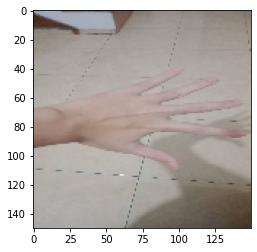

In [25]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)

  if classes[0][1] == 1: # [[0. 1. 0.]]
    print('rock')
  elif classes[0][0] == 1: # [[1. 0. 0.]]
    print('paper')
  elif classes[0][2] == 1: # [[0. 0. 1.]]
    print('scissors')



